# Intro to Python for Data Science day 2

mongodb :
    pymongo module, robo 3T, 2701 default port, 

1. collections/documents
    instead of tables/rows
2. collecitons are created within DB as soon as a single document is added to the db

traditional dbs ACID transaction model
Atomic, consistent, isolated, durable

mongodb (unstrurctured data)
BASE model
basic availability, soft-state, eventual consistency



mongo commands
open mongo console
show dbs
use test
show dbs
db.movie.insert({"name":"Indiana Jones"})
    { "_id" : ObjectId("5c472649b6735effd3f2055f"), "name" : "Indiana Jones" }
show dbs
db.movie.find()
    { "_id" : ObjectId("5c472649b6735effd3f2055f"), "name" : "Indiana Jones" }
db.movie.insert({"director":"Brian DePalma", "actors":"Tony Montana"})
    WriteResult({ "nInserted" : 1 })
db.movie.update({'actors':'Tony Montana'},{$set:{'actors':'Kevin Costner'}})
    WriteResult({ "nMatched" : 1, "nUpserted" : 0, "nModified" : 1 })
db.movie.find().pretty()
    { "_id" : ObjectId("5c472649b6735effd3f2055f"), "name" : "Indiana Jones" }
    {
            "_id" : ObjectId("5c4728b9b6735effd3f20560"),
            "director" : "Brian DePalma",
            "actors" : "Kevin Costner"
    }


In [1]:
!cd
!md class
!cd class

C:\Users\admin


In [2]:
import pymongo
# mongo module for python

In [4]:
myclient= pymongo.MongoClient("mongodb://localhost:27017/")

In [5]:
mydb = myclient['mydatabase']
mycol=mydb["customers"]
mydict={"name":"John","address":"Louisville, KY"}
x = mycol.insert_one(mydict)
print(x)

In [6]:
mylist = [{"name":"adam johnson", "address": 'Chicago, IL'}, {"name":"bill hicks","title":"comedian"}]
x = mycol.insert_many(mylist)
print(x.inserted_ids)

[ObjectId('5c47301394cb760ab89d847f'), ObjectId('5c47301394cb760ab89d8480')]


In [7]:
mylist2 = {"_id":100, "name":"kim parker", "style":"blue"}
x = mycol.insert_one(mylist2)
print(x)

In [8]:
print(x.inserted_id)

100


In [9]:
x = mycol.find_one()
print(x)

{'_id': ObjectId('5c472dd394cb760ab89d847e'), 'name': 'John', 'address': 'Louisville, KY'}


In [10]:
for x in mycol.find():
    print(x)

{'_id': ObjectId('5c472dd394cb760ab89d847e'), 'name': 'John', 'address': 'Louisville, KY'}
{'_id': ObjectId('5c47301394cb760ab89d847f'), 'name': 'adam johnson', 'address': 'Chicago, IL'}
{'_id': ObjectId('5c47301394cb760ab89d8480'), 'name': 'bill hicks', 'title': 'comedian'}
{'_id': 100, 'name': 'kim parker', 'style': 'blue'}


In [11]:
# setup in notepad++ for run command
# c:\programdata\anaconda3\python.exe "$(FULL_CURRENT_PATH)"
# name Python, ctrl+shift+y

import os

name="rafiq"

print(name)

os.system("pause")


rafiq


0

In [12]:
import os
import pymongo

myclient= pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient['mydatabase']
mycol=mydb["customers"]
#mydict={"name":"John","address":"Louisville, KY"}
for x in mycol.find():
    print(x)

os.system("pause")


{'_id': ObjectId('5c472dd394cb760ab89d847e'), 'name': 'John', 'address': 'Louisville, KY'}
{'_id': ObjectId('5c47301394cb760ab89d847f'), 'name': 'adam johnson', 'address': 'Chicago, IL'}
{'_id': ObjectId('5c47301394cb760ab89d8480'), 'name': 'bill hicks', 'title': 'comedian'}
{'_id': 100, 'name': 'kim parker', 'style': 'blue'}


0

In [13]:
import os
import pymongo

myclient= pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient['mydatabase']
mycol=mydb["customers"]

for x in mycol.find({},{"_id":0, "name":1}):
    print(x)

os.system("pause")

{'name': 'John'}
{'name': 'adam johnson'}
{'name': 'bill hicks'}
{'name': 'kim parker'}


0

In [16]:
import os
import pymongo

myclient= pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient['mydatabase']
mycol=mydb["customers"]

for x in mycol.find({},{"address":0}):
    print(x)

os.system("pause")

{'_id': ObjectId('5c472dd394cb760ab89d847e'), 'name': 'John'}
{'_id': ObjectId('5c47301394cb760ab89d847f'), 'name': 'adam johnson'}
{'_id': ObjectId('5c47301394cb760ab89d8480'), 'name': 'bill hicks', 'title': 'comedian'}
{'_id': 100, 'name': 'kim parker', 'style': 'blue'}


0

In [18]:
import os
import pymongo

myclient= pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient['mydatabase']
mycol=mydb["customers"]

myquery = {"name":"bill hicks"}

for x in mycol.find(myquery):
    print(x)

os.system("pause")

{'_id': ObjectId('5c47301394cb760ab89d8480'), 'name': 'bill hicks', 'title': 'comedian'}


0

In [22]:
import os
import pymongo

myclient= pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient['mydatabase']
mycol=mydb["customers"]

myquery = {"address":{"$gt":"C"}}
myquery2 = {"address":{"$regex":"^L"}}

#for x in mycol.find(myquery):
for x in mycol.find(myquery2):
    print(x)

os.system("pause")

{'_id': ObjectId('5c472dd394cb760ab89d847e'), 'name': 'John', 'address': 'Louisville, KY'}


0

In [26]:
import os
import pymongo

myclient= pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient['mydatabase']
mycol=mydb["customers"]

myquery = {"address":{"$gt":"C"}}
myquery2 = {"address":{"$regex":"^L"}}
mydoc = mycol.find().sort("name")
mydoc2 = mycol.find().sort("name", -1) # reverse sort
mydoc3 = mycol.find().limit(2)

for x in mydoc3:
    print(x)

os.system("pause")

{'_id': ObjectId('5c472dd394cb760ab89d847e'), 'name': 'John', 'address': 'Louisville, KY'}
{'_id': ObjectId('5c47301394cb760ab89d847f'), 'name': 'adam johnson', 'address': 'Chicago, IL'}


0

In [28]:
# http://insideairbnb.com/get-the-data.html
# get listings and reviews for Chicago

!cd C:\work
!dir

 Volume in drive C has no label.
 Volume Serial Number is B4FC-6CDA

 Directory of C:\Users\admin

01/22/2019  08:17 AM    <DIR>          .
01/22/2019  08:17 AM    <DIR>          ..
01/21/2019  04:33 PM    <DIR>          .3T
01/19/2019  09:42 AM    <DIR>          .conda
01/22/2019  06:37 AM               217 .dbshell
01/22/2019  05:54 AM    <DIR>          .ipynb_checkpoints
01/19/2019  11:03 AM    <DIR>          .ipython
01/22/2019  07:52 AM    <DIR>          .jupyter
01/19/2019  11:12 AM    <DIR>          .matplotlib
01/21/2019  04:27 PM                 0 .mongorc.js
01/19/2019  11:11 AM    <DIR>          .pylint.d
01/19/2019  09:03 AM    <DIR>          .vscode
01/21/2019  06:43 PM    <DIR>          3D Objects
11/25/2018  05:25 PM        85,255,590 Chi_Nov18.csv
01/22/2019  06:45 AM    <DIR>          class
01/21/2019  06:43 PM    <DIR>          Contacts
01/21/2019  06:43 PM    <DIR>          Desktop
01/21/2019  06:43 PM    <DIR>          Documents
01/21/2019  06:43 PM    <DIR>        

In [44]:
import csv

csvfile = open('Chi_Nov18.csv', newline='', encoding='utf8')

In [45]:
type(csvfile)

_io.TextIOWrapper

In [46]:
reader = csv.reader(csvfile)

In [47]:
next(reader)

['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']

In [48]:
next(reader)

['2384',
 '25218143',
 '2015-01-09',
 '14385014',
 'Ivan',
 "it's a wonderful trip experience. I didn't except the bedroom is so big and have a queen size bed.  it's very comfortable very quiet. and the host is very kind. she prepared breakfast and dinner for me. I am so appreciate everything she did for me."]

In [49]:
rows = 0
for row in reader:
    rows += 1
print(rows)

268611


In [51]:
import csv

csvfile = open('Chi_Nov18.csv', newline='', encoding='utf8')
reader = csv.reader(csvfile)
headers = next(reader)
headers

['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']

In [52]:
records = list(reader)

In [53]:
records[0]

['2384',
 '25218143',
 '2015-01-09',
 '14385014',
 'Ivan',
 "it's a wonderful trip experience. I didn't except the bedroom is so big and have a queen size bed.  it's very comfortable very quiet. and the host is very kind. she prepared breakfast and dinner for me. I am so appreciate everything she did for me."]

In [54]:
len(records)

268612

In [55]:
records[1]

['2384',
 '28475392',
 '2015-03-24',
 '16241178',
 'Namhaitou',
 "This is my first trip using Airbnb. I was a little nervous before the trip, and didn't know what to expect. I had a wonderful two days stay. The room is big, clean. The location is safe, quite, and convenient. The host is very kind and warm, make me feel like at home. The next morning I arrived, Chicago was cold and snowing, she drove me to my workshop location. after I checked out, she drove me to the hotel I booked for my next meeting. I could not expect any better experience than  this. I am very appreciated all the things she did for me. "]

In [56]:
type(records)

list

In [57]:
headers

['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']

In [58]:
zip(headers,records[0])

In [59]:
list(zip(headers,records[0]))

[('listing_id', '2384'),
 ('id', '25218143'),
 ('date', '2015-01-09'),
 ('reviewer_id', '14385014'),
 ('reviewer_name', 'Ivan'),
 ('comments',
  "it's a wonderful trip experience. I didn't except the bedroom is so big and have a queen size bed.  it's very comfortable very quiet. and the host is very kind. she prepared breakfast and dinner for me. I am so appreciate everything she did for me.")]

In [61]:
ivan_review = records[0]

In [62]:
ivan_review

['2384',
 '25218143',
 '2015-01-09',
 '14385014',
 'Ivan',
 "it's a wonderful trip experience. I didn't except the bedroom is so big and have a queen size bed.  it's very comfortable very quiet. and the host is very kind. she prepared breakfast and dinner for me. I am so appreciate everything she did for me."]

In [63]:
type(records[0])

list

In [66]:
type(records[0][3]) # first row 4th column
print(records[0][3])
print(records[0][4])

14385014
Ivan


In [65]:
ivan_row = records[0][3]
ivan_row

'14385014'

In [67]:
list(zip(headers,records[0]))

[('listing_id', '2384'),
 ('id', '25218143'),
 ('date', '2015-01-09'),
 ('reviewer_id', '14385014'),
 ('reviewer_name', 'Ivan'),
 ('comments',
  "it's a wonderful trip experience. I didn't except the bedroom is so big and have a queen size bed.  it's very comfortable very quiet. and the host is very kind. she prepared breakfast and dinner for me. I am so appreciate everything she did for me.")]

In [68]:
# processData.py
import os
import csv 

csvfile = open('Chi_Nov18.csv', newline='', encoding='utf8')
reader = csv.reader(csvfile)
headers = next(reader)
records = list(reader)


In [77]:
# look for my peeps
ivan = records[0][3] # ivan reviewer id
ivan_reviews = []


In [78]:
#def find_listing():
for row in records:
    if row[3] == ivan:
        ivan_reviews.append(row)
            
print(len(ivan_reviews))
print(ivan_reviews)

1
[['2384', '25218143', '2015-01-09', '14385014', 'Ivan', "it's a wonderful trip experience. I didn't except the bedroom is so big and have a queen size bed.  it's very comfortable very quiet. and the host is very kind. she prepared breakfast and dinner for me. I am so appreciate everything she did for me."]]


In [90]:
fellow_travelers = set()
listing = set([review[0] for review in ivan_reviews])
listings = set(listing)

print(listing)
#print(ivan_reviews)

{'2384'}


In [91]:
for row in records:
    if row[0] in listings:
        fellow_travelers.add(row[3])

print(len(fellow_travelers))

134


In [94]:
fellow_listings = []

for row in records:
    if row[3] in fellow_travelers:
        fellow_listings.append(row[0])
        
len(fellow_listings)

159

In [100]:
unique_list = set(row[0] for row in records if row[3] in fellow_travelers)
        
print(len(unique_list))
print(unique_list)

22
{'3798482', '19619124', '12714714', '13857415', '11698006', '15876178', '14667705', '1746734', '13379881', '18857798', '408268', '12308104', '15785733', '10227627', '22109063', '8985325', '1526309', '10610', '2384', '345075', '4243309', '5414283'}


In [102]:
# scrape.py

import os
import requests
import json
import xml

nytimes= requests.get('http://www.nytimes.com/')
#print(nytimes.text)
print(nytimes.headers)
#nytimes.json() # error

os.system('pause')

{'Connection': 'keep-alive', 'Content-Length': '116809', 'Server': 'nginx', 'Content-Type': 'text/html; charset=utf-8', 'Cache-Control': 'no-cache', 'x-nyt-data-last-modified': 'Tue, 22 Jan 2019 18:12:17 GMT', 'Last-Modified': 'Tue, 22 Jan 2019 18:12:17 GMT', 'X-PageType': 'vi-homepage', 'X-VI-Compatibility': 'Compatible', 'Content-Encoding': 'gzip', 'x-nyt-route': 'vi-homepage', 'X-Origin-Time': '2019-01-22 18:12:18 UTC', 'Accept-Ranges': 'bytes', 'Date': 'Tue, 22 Jan 2019 18:14:36 GMT', 'Age': '68', 'X-Served-By': 'cache-jfk8141-JFK, cache-lax8635-LAX', 'X-Cache': 'HIT, HIT', 'X-Cache-Hits': '1, 5', 'X-Timer': 'S1548180877.915857,VS0,VE0', 'Vary': 'Accept-Encoding, Fastly-SSL', 'Set-Cookie': 'nyt-a=i0gv4r0e1BVNBh6ZeoADri; Expires=Wed, 22 Jan 2020 18:14:36 GMT; Path=/; Domain=.nytimes.com, nyt-gdpr=0; Expires=Wed, 23 Jan 2019 00:14:36 GMT; Path=/; Domain=.nytimes.com', 'x-gdpr': '0', 'X-Frame-Options': 'DENY', 'X-API-Version': 'F-F-VI', 'Content-Security-Policy': "default-src data: 'u

0

In [179]:
sfgov = requests.get('https://data.sfgov.org/resource/wwmu-gmzc.json')

In [111]:
sfgov.json()

[{'actor_1': 'Siddarth',
  'actor_2': 'Nithya Menon',
  'actor_3': 'Priya Anand',
  'director': 'Jayendra',
  'locations': 'Epic Roasthouse (399 Embarcadero)',
  'production_company': 'SPI Cinemas',
  'release_year': '2011',
  'title': '180',
  'writer': 'Umarji Anuradha, Jayendra, Aarthi Sriram, & Suba '},
 {'actor_1': 'Siddarth',
  'actor_2': 'Nithya Menon',
  'actor_3': 'Priya Anand',
  'director': 'Jayendra',
  'locations': 'Mason & California Streets (Nob Hill)',
  'production_company': 'SPI Cinemas',
  'release_year': '2011',
  'title': '180',
  'writer': 'Umarji Anuradha, Jayendra, Aarthi Sriram, & Suba '},
 {'actor_1': 'Siddarth',
  'actor_2': 'Nithya Menon',
  'actor_3': 'Priya Anand',
  'director': 'Jayendra',
  'locations': 'Justin Herman Plaza',
  'production_company': 'SPI Cinemas',
  'release_year': '2011',
  'title': '180',
  'writer': 'Umarji Anuradha, Jayendra, Aarthi Sriram, & Suba '},
 {'actor_1': 'Siddarth',
  'actor_2': 'Nithya Menon',
  'actor_3': 'Priya Anand',
 

In [116]:
sfgov.headers

{'Server': 'nginx', 'Date': 'Tue, 22 Jan 2019 18:20:26 GMT', 'Content-Type': 'application/json; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-Socrata-RequestId': '4u6h53sss5uoelij8spszy05h', 'Access-Control-Allow-Origin': '*', 'ETag': '"YWxwaGEuMzk5Ml8zXzczVHk5T3VSLV8yTkpGdHdUR3hxbXB3Rk9MQlRZKb7hqWSDUx4AxSVlRpNuN5N_KgA-gzip--gzip"', 'X-SODA2-Fields': '["actor_1","actor_2","actor_3","director","distributor","fun_facts","locations","production_company","release_year","title","writer"]', 'X-SODA2-Types': '["text","text","text","text","text","text","text","text","number","text","text"]', 'X-SODA2-Data-Out-Of-Date': 'false', 'X-SODA2-Truth-Last-Modified': 'Fri, 27 Oct 2017 23:24:53 GMT', 'X-SODA2-Secondary-Last-Modified': 'Fri, 27 Oct 2017 23:24:53 GMT', 'Last-Modified': 'Fri, 27 Oct 2017 23:24:53 GMT', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Age': '45793', 'X-Socrata-Region': 'aws-us-east-1-fedramp-prod', 'Strict-Transport-Security': 'max-ag

In [117]:
sfgov.text

'[{"actor_1":"Siddarth","actor_2":"Nithya Menon","actor_3":"Priya Anand","director":"Jayendra","locations":"Epic Roasthouse (399 Embarcadero)","production_company":"SPI Cinemas","release_year":"2011","title":"180","writer":"Umarji Anuradha, Jayendra, Aarthi Sriram, & Suba "}\n,{"actor_1":"Siddarth","actor_2":"Nithya Menon","actor_3":"Priya Anand","director":"Jayendra","locations":"Mason & California Streets (Nob Hill)","production_company":"SPI Cinemas","release_year":"2011","title":"180","writer":"Umarji Anuradha, Jayendra, Aarthi Sriram, & Suba "}\n,{"actor_1":"Siddarth","actor_2":"Nithya Menon","actor_3":"Priya Anand","director":"Jayendra","locations":"Justin Herman Plaza","production_company":"SPI Cinemas","release_year":"2011","title":"180","writer":"Umarji Anuradha, Jayendra, Aarthi Sriram, & Suba "}\n,{"actor_1":"Siddarth","actor_2":"Nithya Menon","actor_3":"Priya Anand","director":"Jayendra","locations":"200 block Market Street","production_company":"SPI Cinemas","release_year"

In [118]:
type(sfgov.text)

str

In [119]:
type(sfgov.json())

list

In [120]:
type(sfgov.json()[0])

dict

In [121]:
len(sfgov.json())

1000

In [180]:
sfgov.json()[0]

{'actor_1': 'Siddarth',
 'actor_2': 'Nithya Menon',
 'actor_3': 'Priya Anand',
 'director': 'Jayendra',
 'locations': 'Epic Roasthouse (399 Embarcadero)',
 'production_company': 'SPI Cinemas',
 'release_year': '2011',
 'title': '180',
 'writer': 'Umarji Anuradha, Jayendra, Aarthi Sriram, & Suba '}

In [125]:
sfgov.json()[0]['actor_1']

'Siddarth'

In [181]:
sfgov.json()[0]['locations']

'Epic Roasthouse (399 Embarcadero)'

In [197]:
#locations = []

#results = [ item['locations'] for item in sfgov.json() ]
a = sfgov.json()[0]['locations']
print(a)
for curLoc in sfgov.json():
    print(curLoc['locations'])
    
        
    #locations = locations.insert(curLoc[]['locations'])
    
#print(len(locations))
#print(results)

Epic Roasthouse (399 Embarcadero)


AttributeError: 'Response' object has no attribute 'items'

In [149]:
sfgov2 = requests.get('https://data.sfgov.org/resource/wwmu-gmzc.xml')

In [153]:
sfgov2.headers

{'Server': 'nginx', 'Date': 'Tue, 22 Jan 2019 18:59:50 GMT', 'Content-Type': 'text/xml;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-Socrata-RequestId': '2vpx6fq1wm03rg02v7wcuif83', 'Access-Control-Allow-Origin': '*', 'ETag': '"YWxwaGEuMzk5Ml8zXzczTEFSOHRMOFlad1pnQldLeWxfS21vVG5weEU0zjGH52dSymqXhvNlIZrpynu3VvE-gzip--gzip"', 'Last-Modified': 'Fri, 27 Oct 2017 23:24:53 GMT', 'X-SODA2-Data-Out-Of-Date': 'false', 'X-SODA2-Truth-Last-Modified': 'Fri, 27 Oct 2017 23:24:53 GMT', 'X-SODA2-Secondary-Last-Modified': 'Fri, 27 Oct 2017 23:24:53 GMT', 'X-SODA2-Warning': 'X-SODA2-Fields, X-SODA2-Types, and X-SODA2-Legacy-Types are deprecated', 'X-SODA2-Fields': '["actor_1","fun_facts","director","release_year","locations","actor_3","writer","actor_2","title","distributor","production_company"]', 'X-SODA2-Types': '[]', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Age': '288', 'X-Socrata-Region': 'aws-us-east-1-fedramp-prod', 'Strict-Transport-Security': 'ma

In [154]:
myapi = requests.get('https://api.foursquare.com/v2/venues/search')

In [155]:
myapi.text

'{"meta":{"code":400,"errorType":"invalid_auth","errorDetail":"Missing access credentials. See https:\\/\\/developer.foursquare.com\\/docs\\/api\\/configuration\\/authentication for details.","requestId":"5c4768ce4434b94789622ea4"},"response":{}}'

<function matplotlib.pyplot.show(*args, **kw)>

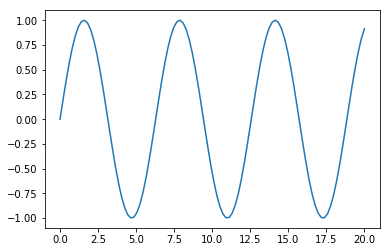

In [166]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

x = np.linspace(0,20,100)
plt.plot(x,np.sin(x))
plt.show

TypeError: 'str' object is not callable

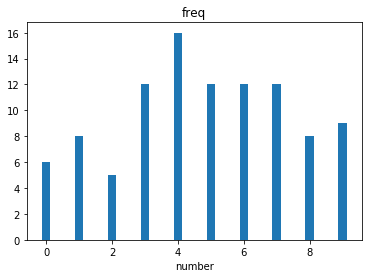

In [175]:
import matplotlib.pyplot as plt
#import matplotlib as mpl
import numpy as np

nums = np.random.randint(0,10,100)
fig,plot = plt.subplots()
plot.hist(nums,range=(0,10), align='left', rwidth=0.25)
plot.set_title('freq')
plot.set_xlabel('number')
plot.set_xticks(range(10))
plot.set_ylabel('freq')
plot.set_yticks(range(20))
plot.get_yaxis().grid()

plt.show